<a href="https://colab.research.google.com/github/niha21ah/ml-project/blob/nils/Copy_of_ML_end_projectv2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
# ml models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
per = pd.read_csv('/content/Perth.csv')

---
# 1. EDA and Feature Engineering



Content:


*   Discuss Class imbalance
*   Scale
*   Plot




In [4]:
per.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [5]:
#Checking if Total_power is the sum of all power outputs:
power_cols = per.filter(regex = r'^Pow').columns


In [6]:
power_cols

Index(['Power1', 'Power2', 'Power3', 'Power4', 'Power5', 'Power6', 'Power7',
       'Power8', 'Power9', 'Power10', 'Power11', 'Power12', 'Power13',
       'Power14', 'Power15', 'Power16', 'Power17', 'Power18', 'Power19',
       'Power20', 'Power21', 'Power22', 'Power23', 'Power24', 'Power25',
       'Power26', 'Power27', 'Power28', 'Power29', 'Power30', 'Power31',
       'Power32', 'Power33', 'Power34', 'Power35', 'Power36', 'Power37',
       'Power38', 'Power39', 'Power40', 'Power41', 'Power42', 'Power43',
       'Power44', 'Power45', 'Power46', 'Power47', 'Power48', 'Power49'],
      dtype='object')

In [7]:
# Idea : Feature Engineering: creating distance from center feature



# Benchmark Logistic Regression


In [8]:
# selecting features and target
cols = [col for col in per.columns if col.startswith(('X', 'Y'))]
X = per[cols]
y = per['Total_Power']

In [9]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# model Linear Regression
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [11]:
# prediction
y_pred = linr.predict(X_test)

In [12]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rsme = root_mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print('Evaluation Lin Regression')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rsme)
print('R2:', r2)

Evaluation Lin Regression
MAE: 36706.65108151367
MSE: 2472748809.072387
RMSE: 49726.74138803373
R2: 0.8322228432905648


Attempt for improval: scaling features
(although Linear Regression is not sensitive to scale differences, it can improve the results, and for comparability reasons

In [13]:
# apply standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# fit scaled
linr.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
y_pred_sc = linr.predict(X_test_scaled)

In [16]:
y_pred_train_sc = linr.predict(X_train_scaled)

In [17]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred_sc)
mse = mean_squared_error(y_test, y_pred_sc)
rsme = root_mean_squared_error(y_test, y_pred_sc)
r2= r2_score(y_test, y_pred_sc)

mae_train = mean_absolute_error(y_train, y_pred_train_sc)
mse_train = mean_squared_error(y_train, y_pred_train_sc)
rsme_train = root_mean_squared_error(y_train, y_pred_train_sc)
r2_train = r2_score(y_train, y_pred_train_sc)


print('Evaluation scaled Lin Regression')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rsme)
print('R2:', r2,'\n')

print('MAE:',mae_train)
print('MSE:',mse_train)
print('RMSE:',rsme_train)
print('R2:',r2_train)

Evaluation scaled Lin Regression
MAE: 36706.65108151365
MSE: 2472748809.072386
RMSE: 49726.74138803372
R2: 0.832222843290565 

MAE: 36765.491983255226
MSE: 2527594013.1434755
RMSE: 50275.18287528625
R2: 0.8327039734449707


In [18]:
scores = cross_val_score(linr, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Evaluations', scores)

print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Evaluations [-50300.86947996 -51500.32635773 -50705.26317488 -50605.20178119
 -50401.81162172]
Mean: 50702.694483095
Std: 423.7267661954299


In [19]:
linr.coef_

array([ 21649.25047568, -10475.2628573 ,  13364.4906173 ,  -3472.11111154,
         3553.19170888,   8677.0097376 ,  10334.91875429,  22794.23667674,
        11702.39811917,  -7813.97365216,  11641.29306729,  10636.63160457,
         8557.97611724, -18442.64101928,  16375.77599971,  13855.23024062,
        19271.99968693,   7625.71880528,   8876.60515739,  -7820.33917029,
         8355.2465135 ,  -4847.16249512,   8305.37101254,   -429.38763391,
         7474.18966985, -32840.56106881,   8155.07244157,  -3581.4302999 ,
         6166.5579795 ,  15881.99208626,   -947.23127561,   2388.52210184,
         3860.24989188,  -3741.46716424,   3076.16785707,  -3749.43296347,
         6103.50914859,  -5229.40104568,   -367.42411708,  -3016.45005321,
         3460.2124098 , -14587.34910565,   2506.46186327,    725.57064831,
         2080.54821038,  25869.16440825,  -1700.17746114,  -5352.63269548,
         2204.00289181,   4845.82299884,  -2223.11444416, -12729.19084225,
         6354.97349915,  

No differences because LR is scale-invariant without regularization. Can be used as soon as Regularisation is attempted

Plot for accuracy of the prediction:
red line

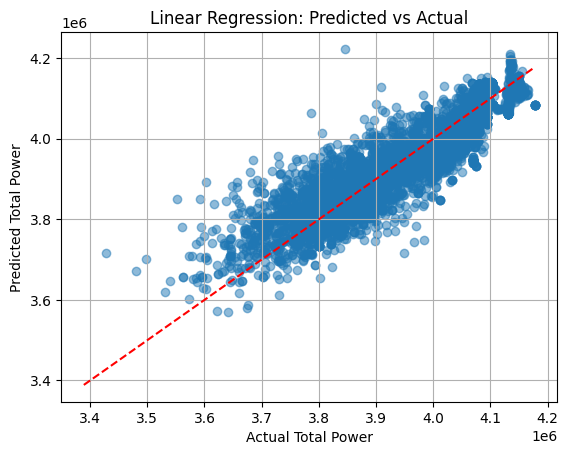

In [20]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Total Power")
plt.ylabel("Predicted Total Power")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.show()

Attempt 2 for improval: Ridge Regression

In [21]:
params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best parameters: ", grid.best_estimator_)
best_ridge = grid.best_estimator_


Best parameters:  Ridge(alpha=100.0)


In [22]:
best_ridge.get_params()

{'alpha': 100.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [23]:
y_pred_ridge = best_ridge.predict(X_test_scaled)

In [24]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rsme = root_mean_squared_error(y_test, y_pred_ridge)
r2= r2_score(y_test, y_pred_ridge)

print('Evaluation Ridge Regression')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rsme)
print('R2:', r2)

Evaluation Ridge Regression
MAE: 36694.343499845265
MSE: 2476807974.662804
RMSE: 49767.539367169884
R2: 0.8319474270174383


Ridge Regression is not sensitive to the scale of y, only to the scale of the input features (X), because the penalty term (α * sum(β²)) applies only to the coefficients of features — not the output.


In [25]:
scores = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Evaluations', scores)

Evaluations [-50324.30481919 -51423.68344105 -50751.47610143 -50519.2407304
 -50398.78863846]


In [26]:
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Mean: 50683.49874610772
Std: 397.3802012482082


Attempt 3 for improvement: Lasso Regression

In [27]:
params =  {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso()
grid =  GridSearchCV(lasso, params, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best parameters: ", grid.best_estimator_)
best_lasso = grid.best_estimator_

Best parameters:  Lasso(alpha=100)


In [28]:
y_pred_lasso = best_lasso.predict(X_test_scaled)

In [29]:
scores = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Evaluations', scores)

Evaluations [-50377.06461353 -51459.58880024 -50779.38001842 -50507.59394574
 -50422.55240679]


In [30]:
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Mean: 50709.23595694136
Std: 400.28348424720116


Attempt 3 for improvement: Random Forest

Why Doesn’t Random Forest Require Scaling?

Because Random Forest:

  •	Is based on decision trees

  •	Splits data by thresholds, not by distances or magnitude


In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred_rf = rf.predict(X_test)

In [40]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('Evaluations', scores)

print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Evaluations [-30104.21599637 -29047.83013371 -29282.63167636 -28961.4051321
 -29708.01617006]
Mean: 29420.81982172128
Std: 428.6703166622275


Using Gridsearch to find the best model

In [37]:
params = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt', None]
}

#grid = GridSearchCV(rf, params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
#grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_estimator_)
best_rf = RandomForestRegressor(max_depth=20, max_features=None, n_estimators=200)

Best parameters:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [38]:
scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print('Evaluations', scores)

Evaluations [-30037.35370269 -28934.59247472 -29093.01823702 -28732.7461851
 -29728.66424768]


In [39]:
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())

Mean: 29305.27496944195
Std: 495.06472179987077


Best parameters:  RandomForestRegressor(max_depth=20, max_features=None, n_estimators=200)

Choices:


*   n_estimators(default=100): number of trees, more trees ->
lower variance more stable predictions
*   max_depth(default=None): controlling model complexity, balancing overfitting and
*   min_samples split(default=2)


New Approach: XGBoost

In [35]:
xgb = XGBRegressor()
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print('Evaluations', scores)
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())


Evaluations [-25879.49045328 -24936.00116611 -25645.49199849 -24911.2515712
 -25664.96343685]
Mean: 25407.439725185548
Std: 403.5532767606813


In [44]:
params = {
     'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],              # Minimum loss reduction required to split
}

grid= GridSearchCV(xgb, params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_estimator_)
best_xgb = grid.best_estimator_

Best parameters:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [41]:
scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
print('Evaluations', scores)
print(f'Mean:', -scores.mean())
print(f'Std:', scores.std())
best_xgb_rmse = -scores.mean()

Evaluations [-24620.61115553 -23946.362203   -24060.67702784 -24626.41687175
 -24115.35785512]
Mean: 24273.885022648865
Std: 290.639785696108


In [42]:
best_xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 10,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}